In [1]:
import torch
import utils
import lenet

In [2]:
model = lenet.LeNet()
model.apply(lenet.init_cnn)

LeNet(
  (net): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): Sigmoid()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Sigmoid()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=400, out_features=120, bias=True)
    (8): Sigmoid()
    (9): Linear(in_features=120, out_features=84, bias=True)
    (10): Sigmoid()
    (11): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [3]:
x = torch.randn((1,1,28,28))
for layer in model.net:
    x = layer(x)
    print(layer.__class__.__name__, "output_shape:\t", x.shape)

Conv2d output_shape:	 torch.Size([1, 6, 28, 28])
Sigmoid output_shape:	 torch.Size([1, 6, 28, 28])
AvgPool2d output_shape:	 torch.Size([1, 6, 14, 14])
Conv2d output_shape:	 torch.Size([1, 16, 10, 10])
Sigmoid output_shape:	 torch.Size([1, 16, 10, 10])
AvgPool2d output_shape:	 torch.Size([1, 16, 5, 5])
Flatten output_shape:	 torch.Size([1, 400])
Linear output_shape:	 torch.Size([1, 120])
Sigmoid output_shape:	 torch.Size([1, 120])
Linear output_shape:	 torch.Size([1, 84])
Sigmoid output_shape:	 torch.Size([1, 84])
Linear output_shape:	 torch.Size([1, 10])


Training on cuda
[1/10] loss: 2.52892, acc: 0.15625
[1/10] loss: 2.50587, acc: 0.10156
[1/10] loss: 2.44314, acc: 0.09635
[1/10] loss: 2.42115, acc: 0.09766
[1/10] loss: 2.41508, acc: 0.10469
[1/10] loss: 2.40537, acc: 0.10417
[1/10] loss: 2.38992, acc: 0.10826
[1/10] loss: 2.37921, acc: 0.10938
[1/10] loss: 2.37187, acc: 0.10677
[1/10] loss: 2.36581, acc: 0.10703
[1/10] loss: 2.36175, acc: 0.10369
[1/10] loss: 2.35733, acc: 0.10221
[1/10] loss: 2.35259, acc: 0.09976
[1/10] loss: 2.34820, acc: 0.10212
[1/10] loss: 2.34610, acc: 0.10208
[1/10] loss: 2.34335, acc: 0.10547
[1/10] loss: 2.34069, acc: 0.10708
[1/10] loss: 2.33883, acc: 0.10634
[1/10] loss: 2.33751, acc: 0.10650
[1/10] loss: 2.33625, acc: 0.10586
[1/10] loss: 2.33508, acc: 0.10454
[1/10] loss: 2.33467, acc: 0.10369
[1/10] loss: 2.33354, acc: 0.10292
[1/10] loss: 2.33223, acc: 0.10417
[1/10] loss: 2.33094, acc: 0.10375
[1/10] loss: 2.32981, acc: 0.10397
[1/10] loss: 2.32848, acc: 0.10475
[1/10] loss: 2.32748, acc: 0.10491
[1/

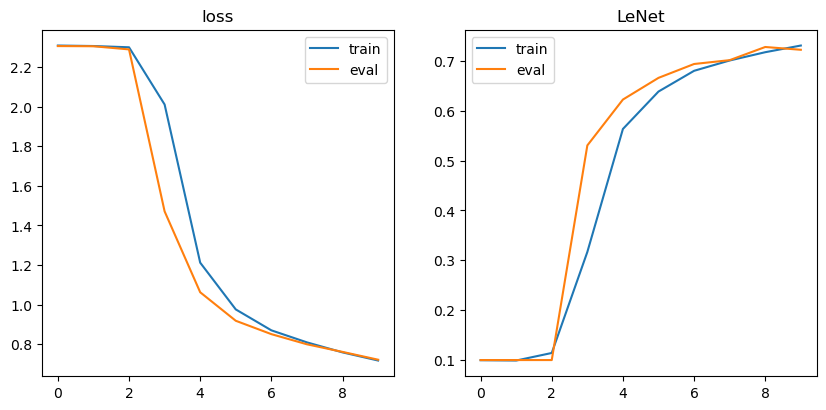

Figure saved in pwd


In [4]:
utils.train(
    model=model,
    learning_rate=0.1, epochs=10,
    data=utils.MnistData()
)